## Volcker Rule 2018 Notice of Proposed Rulemaking

I worked on a project (https://www.regulations.gov/document?D=OCC-2018-0010-0067) to assess reforms proposed in 2018 to the Volcker Rule. These charts look at part of the proposal, described in the quote below. Ultimately, this part was not adopted in the overall change to the final rule.
https://www.regulations.gov/document?D=OCC-2018-0010-0155 


>"the proposal ... establishes a presumption of compliance for such trading desks whose absolute profits and losses over a 90-calendar day period do not exceed \$25 million, relieving such desks of any compliance obligations under the Volcker Rule."

Tl;dr

This a questionable proposal with pro-cyclical effects on trading desk portfolio size.


I model the asset holdings of a hypothetical trading desk under the proposal. Regulators would presume compliance for a trading desk if the desk's accumulated gross daily profits and losses for 90 days fall under $25 million. To assess the impact of this novel metric, I use historical data (from Yahoo Finance) to model the size of portfolios that would hit the limit using two very basic ETFs: large cap stocks (SPY) and investment grade bonds (AGG). 

I calculate daily percent change based off closing price (adjusted for dividends) and sum that on a quarterly basis.

The findings show that for example holding about 45 million dollars in the vanilla investment grade bond ETF (AGG) at the start of Q4 2008 (the worst in memory) would experience 90 days of accumulated gross P&L of 25 million dollars. Whereas at the start of Q1 2013 that portfolio would have to be nearly 400 million dollars to experience that level of accumulated gross P&L. 

I also calculate the figures on a daily rolling basis and plot the distribution to show that the holding amount varies by an order of magnitude for each ETF. 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_spy = pd.read_csv('~/Documents/DataScience/Portfolio/spy.csv')
df_agg = pd.read_csv('~/Documents/DataScience/Portfolio/agg.csv')

df_spy.Date = pd.to_datetime(df_spy.Date)
df_agg.Date = pd.to_datetime(df_agg.Date)

In [2]:
df_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,146.529999,146.990005,143.880005,144.929993,113.806908,204935600
1,2008-01-03,144.910004,145.490005,144.070007,144.860001,113.751953,125133300
2,2008-01-04,143.339996,143.440002,140.910004,141.309998,110.964272,232330900
3,2008-01-07,141.809998,142.229996,140.100006,141.190002,110.870056,234991000
4,2008-01-08,142.080002,142.899994,138.440002,138.910004,109.079704,326365700


/Users/henrybowens/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


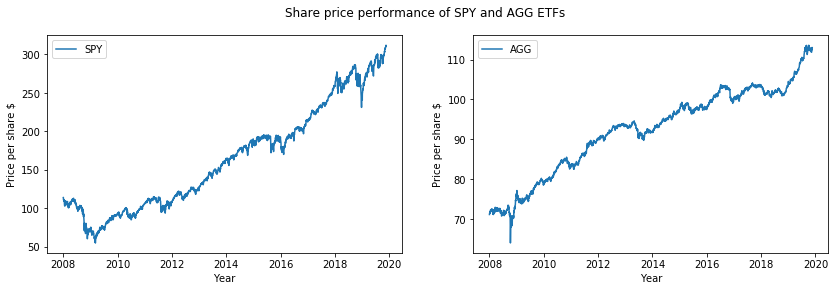

In [3]:
fig = plt.figure(figsize=(14,4))

x = df_spy['Date']
y1 = df_spy['Adj Close']
y2 = df_agg['Adj Close']

plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.xlabel('Year')
plt.ylabel('Price per share $')
plt.legend(['SPY'])

plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.xlabel('Year')
plt.ylabel('Price per share $')
plt.legend(['AGG'])
plt.suptitle('Share price performance of SPY and AGG ETFs');

In [4]:
# using pandas pct_change

df_spy['spy_delta'] = df_spy['Adj Close'].pct_change().abs()
df_spy['agg_delta'] = df_agg['Adj Close'].pct_change().abs()

In [5]:
# pick date and delta cols. set date to date time
df1 = df_spy.loc[:, ['Date', 'spy_delta', 'agg_delta']]
df1.Date = pd.to_datetime(df1.Date)
#df1.set_index('Date', inplace=True)   do this later

In [6]:
df1.head()

,Date,spy_delta,agg_delta
0,2008-01-02,NaN,NaN
1,2008-01-03,0.000483,0.002656
2,2008-01-04,0.024507,0.002061
3,2008-01-07,0.000849,0.001273
4,2008-01-08,0.016148,0.002542


In [7]:
df1[df1.Date > '2008-04-01'].sum()

spy_delta    22.551229
agg_delta     5.545639
dtype: float64

In [8]:
#resample to quarterly
df1.set_index('Date', inplace=True)
dfq = df1.resample('QS').sum()

In [9]:
# using 25 instead of 25million sets the portfolio columns to millions... obviously
dfq['spy_portfolio'] = 25 / (dfq.spy_delta)

dfq['agg_portfolio'] = 25 / (dfq.agg_delta)

In [10]:
dfq.head()

,spy_delta,agg_delta,spy_portfolio,agg_portfolio
Date,,,,
2008-01-01,0.693769,0.197044,36.035065,126.875294
2008-04-01,0.474352,0.180309,52.703506,138.651041
2008-07-01,0.950384,0.203177,26.305163,123.045190
2008-10-01,2.166254,0.553213,11.540657,45.190529
2009-01-01,1.212047,0.233286,20.626257,107.164464


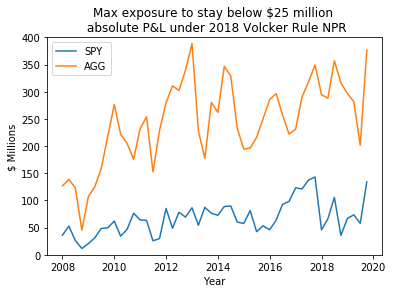

In [11]:
x = dfq.index
y1 = dfq.spy_portfolio
y2 = dfq.agg_portfolio

plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('Year')
plt.ylabel('$ Millions')
plt.ylim(0, 400)
plt.legend(['SPY', 'AGG'])
plt.title('Max exposure to stay below $25 million \n absolute P&L under 2018 Volcker Rule NPR');

The volatility of the proposed "accumulated gross daily profit and loss" varies widely even on vanilla assets like the SPY and AGG ETFs 

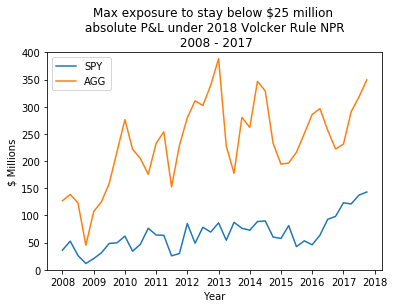

In [12]:
x = dfq.index[:-8]
y1 = dfq.spy_portfolio[:-8]
y2 = dfq.agg_portfolio[:-8]

plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('Year')
plt.ylabel('$ Millions')
plt.ylim(0, 400)
plt.legend(['SPY', 'AGG'])
plt.title('Max exposure to stay below $25 million \n absolute P&L under 2018 Volcker Rule NPR \n 2008 - 2017');

In [13]:
df1.head()

,spy_delta,agg_delta
Date,,
2008-01-02,NaN,NaN
2008-01-03,0.000483,0.002656
2008-01-04,0.024507,0.002061
2008-01-07,0.000849,0.001273
2008-01-08,0.016148,0.002542


In [59]:
df1.rolling('90d', min_periods=60).sum().shift(-60).head()

,spy_delta,agg_delta,spy_portfolio,agg_portfolio
Date,,,,
2008-01-02,0.693769,0.197044,2619.613538,7817.398864
2008-01-03,0.728928,0.203841,2638.978151,7829.331250
2008-01-04,0.729104,0.201678,2658.001839,7846.375991
2008-01-07,0.707085,0.202766,2676.420125,7860.258756
2008-01-08,0.708180,0.207867,2733.342791,8004.340954


In [41]:
df1[df1.index < '2008-04-01'].sum()

spy_delta    0.693769
agg_delta    0.197044
dtype: float64

In [52]:
# how to get this on a rolling basis? the portfolio columns need to be the rolling sum of t through t+90

# answer: the rolling function uses the right most point, ie is backward looking. this probably isnt a problem, but here i 
# used shift to push it back 60 days, and 60 days min periods (calendar quarters have an average of 62 or 63 days 
# in recent years according to wikipedia).


df1['spy_portfolio'] = 25 / (df1.spy_delta.rolling('90d', min_periods=60).sum().shift(-60))

df1['agg_portfolio'] = 25 / (df1.agg_delta.rolling('90d', min_periods=60).sum().shift(-60))

In [53]:
df1.head()

,spy_delta,agg_delta,spy_portfolio,agg_portfolio
Date,,,,
2008-01-02,NaN,NaN,36.035065,126.875294
2008-01-03,0.000483,0.002656,34.296936,122.644857
2008-01-04,0.024507,0.002061,34.288658,123.960193
2008-01-07,0.000849,0.001273,35.356429,123.295106
2008-01-08,0.016148,0.002542,35.301758,120.269210


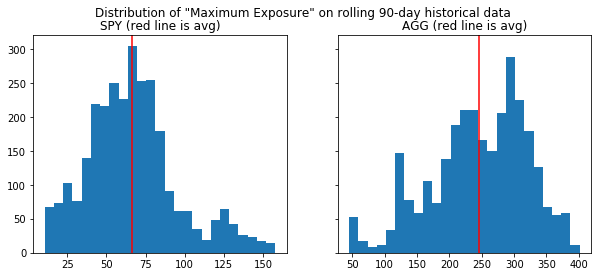

In [87]:
x1 = df1.spy_portfolio
x2 = df1.agg_portfolio
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
ax1.set_title('SPY (red line is avg)')
ax1.hist(x1, bins=25)
ax1.axvline(x1.mean(), color='red')

ax2.hist(x2, bins=25)
ax2.axvline(x2.mean(), color='red')
ax2.set_title('AGG (red line is avg)')
plt.suptitle('Distribution of "Maximum Exposure" on rolling 90-day historical data');

These charts show the distribution of the maximum exposure calculated every day on a forward looking 90-day basis from 2008 to mid 2019. The line charts above do so for the beginning of each quarter. These give a fuller picture of how broadly distributed the maximum exposure would be in the time period used. 